# Memanggil Data

In [1]:
import pandas as pd

# load
pizza = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/data/pizza_sales.xlsx")

# cek struktur
pizza.head()


,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# 1. Pre-processing Data

### Cek missing values

In [2]:
pizza.isnull().sum()

,0
order_details_id,0
order_id,0
pizza_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


### Cek tipe data

In [3]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


### Mengganti tipe data pada kolom order_time

In [4]:
pizza['order_time'] = pd.to_datetime(pizza['order_time'], format='%H:%M:%S').dt.time

### Mengganti tipe data pizza_size jadi kategori berurutan

In [5]:
pizza['pizza_size'] = pd.Categorical(
    pizza['pizza_size'],
    categories=['S','M','L','XL','XXL'],
    ordered=True
)

# 2. Analisis Penjualan

### Pendapatan Bulanan

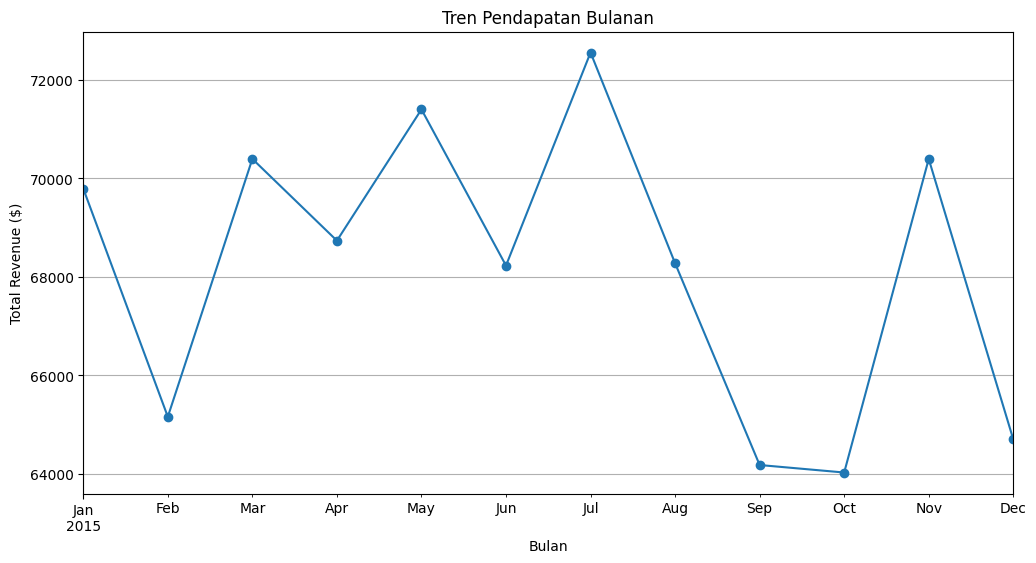

Total pendapatan keseluruhan: $817,860.05


In [10]:
# Pendapatan Bulanan
monthly_revenue = pizza.groupby(pizza['order_date'].dt.to_period('M'))['total_price'].sum()

monthly_revenue.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Tren Pendapatan Bulanan')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Bulan')
plt.grid()
plt.show()

# Total pendapatan
total_revenue = pizza['total_price'].sum()
print(f"Total pendapatan keseluruhan: ${total_revenue:,.2f}")

### 10 Pizza paling banyak terjual (total jumlah)

In [11]:
pizza_counts = pizza.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False)

print("10 Pizza paling banyak terjual:")
print(pizza_counts.head(10))

10 Pizza paling banyak terjual:
pizza_name
The Classic Deluxe Pizza        2453
The Barbecue Chicken Pizza      2432
The Hawaiian Pizza              2422
The Pepperoni Pizza             2418
The Thai Chicken Pizza          2371
The California Chicken Pizza    2370
The Sicilian Pizza              1938
The Spicy Italian Pizza         1924
The Southwest Chicken Pizza     1917
The Big Meat Pizza              1914
Name: quantity, dtype: int64


### Kategori pizza terlaris

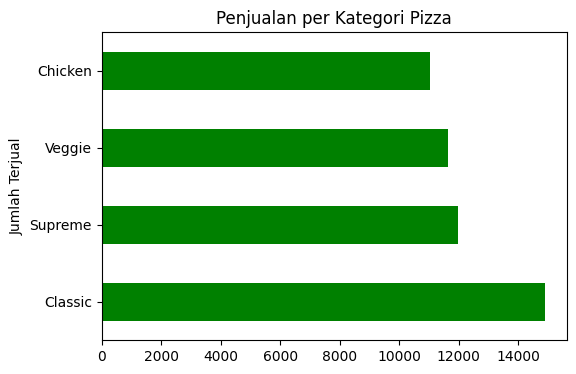

In [14]:
category_sales = pizza.groupby('pizza_category')['quantity'].sum().sort_values(ascending=False)

category_sales.plot(kind='barh', figsize=(6,4), color='green')
plt.title('Penjualan per Kategori Pizza')
plt.ylabel('Jumlah Terjual')
plt.show()

### Ukuran pizza terlaris

/tmp/ipython-input-13-2909709452.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_sales = pizza.groupby('pizza_size')['quantity'].sum().sort_values()


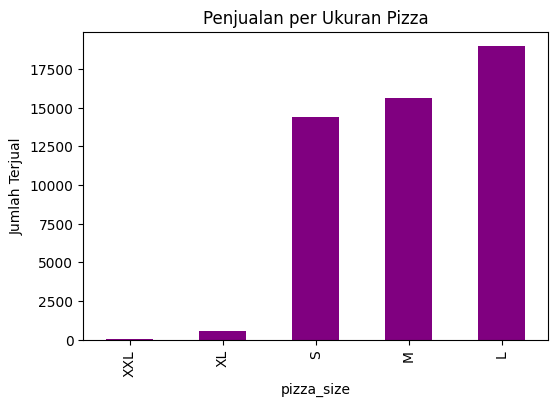

In [13]:
size_sales = pizza.groupby('pizza_size')['quantity'].sum().sort_values()

size_sales.plot(kind='bar', figsize=(6,4), color='purple')
plt.title('Penjualan per Ukuran Pizza')
plt.ylabel('Jumlah Terjual')
plt.show()

### Jam ramai penjualan (peak hours)

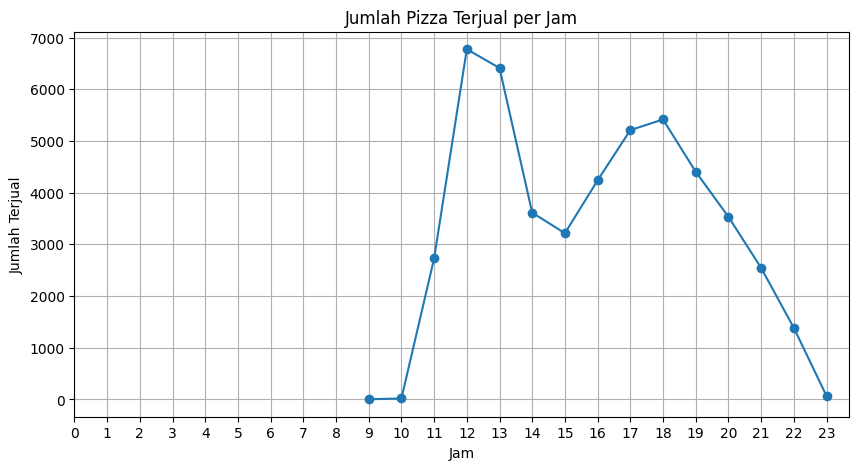

In [15]:
# jam dalam bentuk integer
pizza['order_hour'] = pd.to_datetime(pizza['order_time'], format='%H:%M:%S').dt.hour

hourly_sales = pizza.groupby('order_hour')['quantity'].sum()

plt.figure(figsize=(10,5))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o')
plt.title('Jumlah Pizza Terjual per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Terjual')
plt.xticks(range(0,24))
plt.grid()
plt.show()

### Hari penjualan teramai

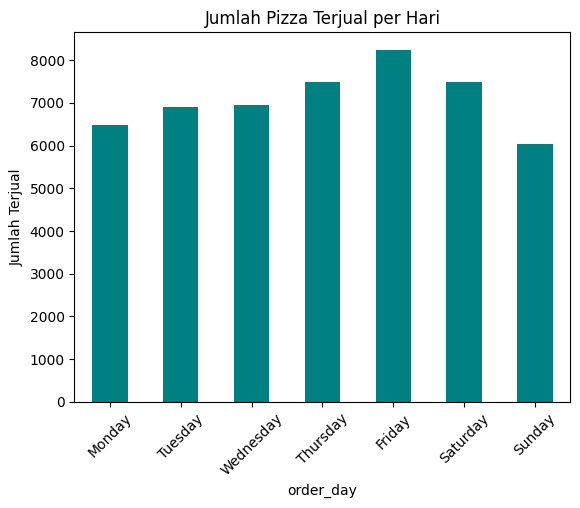

In [16]:
# nama hari
pizza['order_day'] = pizza['order_date'].dt.day_name()

day_sales = pizza.groupby('order_day')['quantity'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

day_sales.plot(kind='bar', color='teal')
plt.title('Jumlah Pizza Terjual per Hari')
plt.ylabel('Jumlah Terjual')
plt.xticks(rotation=45)
plt.show()

### Bahan pizza yang sering dipakai

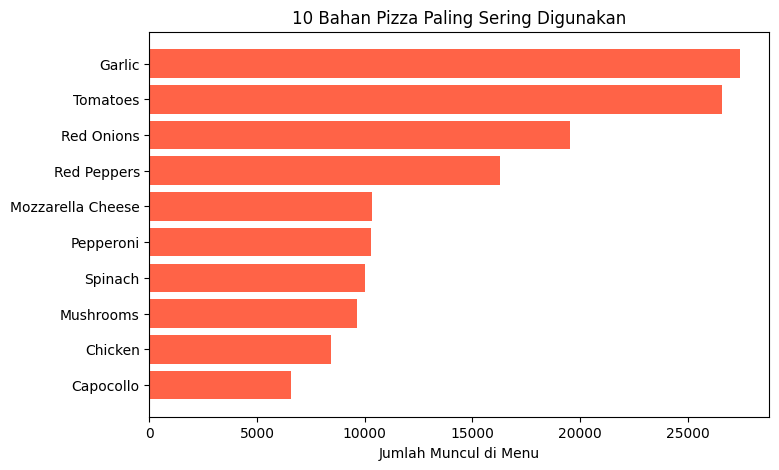

In [19]:
from collections import Counter

# gabungkan semua ingredient jadi satu string besar
all_ingredients = ", ".join(pizza['pizza_ingredients'])

# pisahkan berdasarkan koma
ingredient_list = [i.strip() for i in all_ingredients.split(",")]

# hitung frekuensi
ingredient_counts = Counter(ingredient_list)

# ambil 10 teratas
top_10_ingredients = ingredient_counts.most_common(10)

# convert ke dataframe biar enak divisualisasikan
import pandas as pd

top_ingredients_df = pd.DataFrame(top_10_ingredients, columns=['ingredient', 'count'])

# plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(top_ingredients_df['ingredient'], top_ingredients_df['count'], color='tomato')
plt.xlabel('Jumlah Muncul di Menu')
plt.title('10 Bahan Pizza Paling Sering Digunakan')
plt.gca().invert_yaxis()
plt.show()

# 3. Insight dan Rekomendasi menggunakan IBM-Granite

### Memanggil IBM Granite

In [27]:
!pip install -U langchain langchain-community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.9 MB/s eta 0:00:00


In [50]:
from langchain_community.llms import Replicate
from google.colab import userdata
import textwrap
import os

# dapet token
api_token = userdata.get("api_token")
os.environ["REPLICATE_API_TOKEN"] = api_token

# definisikan LLM
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    model_kwargs={
        "top_k": 5,
        "top_p": 1.0,
        "max_tokens": 8192,
        "temperature": 0,
        "repetition_penalty": 1.0
    }
)

### Insight yang dapat diambil dari data pizza sales

In [52]:
prompt_insight = f"""
Berikut ringkasan data penjualan pizza:

- Total pendapatan: ${total_revenue:,.2f}
- Pizza dengan penjualan terbanyak: {pizza_counts.index[0]}
- Kategori pizza terlaris: {category_sales.index[0]}
- Ukuran pizza paling populer: {size_sales.index[-1]}
- Jam penjualan tertinggi: pukul {hourly_sales.idxmax()} dengan {hourly_sales.max()} pizza terjual
- Hari dengan penjualan tertinggi: {day_sales.idxmax()} dengan {day_sales.max()} pizza terjual

Jelaskan insight data ini dalam gaya bahasa laporan bisnis, dalam 3-4 paragraf.
"""

output = llm.invoke(prompt_insight)

In [77]:
for line in output.split('\n'):
    print(textwrap.fill(line, width=120))

**Ringkasan Data Penjualan Pizza**

Pada periode ini, toko pizza mencapai pendapatan total sebesar $817,860.05, menunjukkan kinerja yang kuat di pasar.
Penjualan terkemuka diperoleh oleh The Classic Deluxe Pizza, yang menunjukkan kebutuhan pelanggan terhadap variasi
Classic kategori pizza. Kategori Classic menjadi kategori paling populer, mencatatkan dominasi pasar dengan variasi
produk yang tersedia.

**Popularitas Ukuran dan Waktu Penjualan**

Ukuran pizza L menjadi ukuran paling populer diantara pelanggan, sangat menunjukkan preferensi konsumen terhadap ukuran
yang sesuai untuk kebutuhan individu atau kelompok kecil. Dengan ukuran ini, toko dapat memastikan kepuasan pelanggan
dan mencapai konsistensi dalam penjualan. Waktu penjualan tertinggi terjadi pada pukul 12 siang, dengan jumlah pizza
terjual mencapai 6776 unit, sugges- ting optimalitas waktu operasi dan keseimbangan antara permintaan konsumen dan
kemampuan produksi.

**Hari dan Jam Penjualan Terbaik**

Hari dengan penjualan t

### Rekomendasi untuk toko pizza berdasarkan data penjualan

In [67]:
prompt_recommend = f"""
Berdasarkan data berikut:

- Pizza terlaris: {pizza_counts.index[0]}
- Kategori terlaris: {category_sales.index[0]}
- Ukuran terpopuler: {size_sales.index[-1]}
- Waktu penjualan tertinggi: pukul {hourly_sales.idxmax()} dan hari {day_sales.idxmax()}

Beri saya rekomendasi bisnis yang actionable (spesifik dan dapat ditindaklanjuti)
untuk meningkatkan penjualan pizza ke depan.
Tuliskan rekomendasi dalam 3-4 paragraf.
"""

output1 = llm.invoke(prompt_recommend)

In [76]:
for line in output1.split('\n'):
    print(textwrap.fill(line, width=120))

Berdasarkan data yang diberikan, berikut adalah beberapa rekomendasi bisnis spesifik dan dapat ditindaklanjuti untuk
meningkatkan penjualan pizza ke depan:

1. **Memperkuat Kategori Classic dengan Variasi Produk**: Karena kategori Classic adalah kategori terlaris, coba
mengembangkan variasi produk dalam kategori ini untuk menarik pelanggan lebih lanjut. Misalnya, Anda dapat membuat
Classic Deluxe Pizza dengan topping tambahan saat ini yang populer, seperti caraian bacon, ayam goreng, atau selera
vegan dengan topping seperti kentang, jagung, dan tofu. Pastikan untuk menyajikan merek tersebut prominen di menu dan
promosi, serta memastikan kualitas dan konstanan rasa yang tinggi.

2. **Optimasi Ukuran dan Promosi Spesial Hari Friday**: Ukuran terpopuler adalah L, jadi pastikan Anda mempromosikan
ukuran tersebut sebagai pilihan default atau memberikan diskon kepada pelanggan yang memilih ukuran L. Selain itu,
karena penjualan tertinggi pada pukul 12 dan hari Jumat, Anda dapat mengembangkan

# 4. Saran Improvisasi Penjualan dengan Market Basket Analysis

### Jumlah item per transaksi (jumlah pizza dalam satu order)

In [85]:
order_pizza['n_items'] = order_pizza['pizza_name'].apply(len)
print(order_pizza['n_items'].value_counts())

n_items
1     8201
2     6196
3     3325
4     2888
5      144
8       83
7       75
6       75
12      71
11      69
9       65
10      59
13      52
14      38
15       7
21       2
Name: count, dtype: int64


### Market Basket Analysis (Association Rule Mining) dengan Apriori Algorithm.

In [84]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# filter hanya order >= 2 item
multi_item_order = order_pizza[order_pizza['pizza_name'].apply(len) >= 2]

# encode transaksi
te = TransactionEncoder()
te_array = te.fit(multi_item_order['pizza_name']).transform(multi_item_order['pizza_name'])
df_basket = pd.DataFrame(te_array, columns=te.columns_)

# jalankan apriori
frequent_itemsets = apriori(df_basket, min_support=0.001, use_colnames=True)

# rules dengan confidence minimal 0.1
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

rules.sort_values('lift', ascending=False, inplace=True)
print(rules[['antecedents','consequents','support','confidence','lift']].head(10))

                                            antecedents  \
6741      (The Pepper Salami Pizza, The Big Meat Pizza)   
6847   (The Spinach Pesto Pizza, The Four Cheese Pizza)   
6830     (The Pepperoni Pizza, The Chicken Pesto Pizza)   
6824  (The California Chicken Pizza, The Italian Cap...   
6943         (The Sicilian Pizza, The Napolitana Pizza)   
6845      (The Spinach Pesto Pizza, The Hawaiian Pizza)   
6846  (The Spinach Pesto Pizza, The Classic Deluxe P...   
6825  (The Italian Capocollo Pizza, The Italian Supr...   
6831  (The Southwest Chicken Pizza, The Chicken Pest...   
6823  (The Italian Capocollo Pizza, The Thai Chicken...   

                                            consequents   support  confidence  \
6741     (The Sicilian Pizza, The Classic Deluxe Pizza)  0.001141    0.141509   
6847     (The Hawaiian Pizza, The Classic Deluxe Pizza)  0.001141    0.159574   
6830  (The Southwest Chicken Pizza, The Classic Delu...  0.001065    0.119658   
6824  (The Italian Supreme

### 10 kombinasi terkuat

In [99]:
rules_sorted = rules.sort_values(
    by=['lift', 'confidence', 'support'],
    ascending=False
)
top_rules = rules_sorted.head(10)
print(top_rules)

                                            antecedents  \
6741      (The Pepper Salami Pizza, The Big Meat Pizza)   
6847   (The Spinach Pesto Pizza, The Four Cheese Pizza)   
6830     (The Pepperoni Pizza, The Chicken Pesto Pizza)   
6824  (The California Chicken Pizza, The Italian Cap...   
6943         (The Sicilian Pizza, The Napolitana Pizza)   
6845      (The Spinach Pesto Pizza, The Hawaiian Pizza)   
6846  (The Spinach Pesto Pizza, The Classic Deluxe P...   
6825  (The Italian Capocollo Pizza, The Italian Supr...   
6831  (The Southwest Chicken Pizza, The Chicken Pest...   
6823  (The Italian Capocollo Pizza, The Thai Chicken...   

                                            consequents  antecedent support  \
6741     (The Sicilian Pizza, The Classic Deluxe Pizza)            0.008061   
6847     (The Hawaiian Pizza, The Classic Deluxe Pizza)            0.007149   
6830  (The Southwest Chicken Pizza, The Classic Delu...            0.008898   
6824  (The Italian Supreme Pizza, 

### Insight dan rekomendasi yang dapat diperoleh dari hasil market basket analysis

In [102]:
prompt = f"""
Berikut adalah hasil 10 kombinasi menu pizza yang paling sering dibeli bersamaan:

{top_rules[['antecedents','consequents','support','confidence','lift']].to_string()}

Tolong jelaskan insight dan rekomendasi bisnis dan rekomendasi promosi berdasarkan pola kombinasi menu di atas
dengan gaya bahasa indonesia yang profesional.
"""

output2 = llm.invoke(prompt)

In [103]:
for line in output2.split('\n'):
    print(textwrap.fill(line, width=120))

Dari data kombinasi menu pizza yang paling sering dibeli bersamaan, dapat diambil beberapa insight dan rekomendasi
bisnis:

1. **Korelasi antara pizza-pizza**: Ada beberapa kombinasi pizza yang sering dibeli bersama, seperti:
   - The Pepper Salami Pizza dan The Big Meat Pizza (sering dibeli bersama dengan The Sicilian Pizza dan The Classic
Deluxe Pizza)
   - The Spinach Pesto Pizza dan The Four Cheese Pizza (sering dibeli bersama dengan The Hawaiian Pizza dan The Classic
Deluxe Pizza)
   - The Pepperoni Pizza dan The Chicken Pesto Pizza (sering dibeli bersama dengan The Southwest Chicken Pizza dan The
Classic Deluxe Pizza)
   - Lainnya: (The Italian Capocollo Pizza, The Italian Supreme Pizza; The California Chicken Pizza, The Thai Chicken
Pizza)

2. **Kemungkinan upselling**: Dari insight di atas, dapat diambil rekomendasi untuk upselling atau cross-selling dengan
menawarkan kombinasi pizza yang sering dibeli bersamaan. Misalnya, jika pelanggan memilih The Pepper Salami Pizza,
mereka 